## 梯度下降优化算法的概述
链接：http://ruder.io/optimizing-gradient-descent/index.html#momentum   
本文是对链接博客的中文翻译与理解-An overview of gradient descent optimization algorithms。

## 1.梯度下降
梯度下降法是机器学习中最常用的优化方法之一，常用来求解目标函数的极值。  
其基本原理非常简单：沿着目标函数$J(\theta)$梯度下降的方向搜索极小值(也可以沿着梯度上升的方向搜索极大值)。学习率$\eta$决定了我们达到(局部)最小值的步长的大小。  
对于每个样本i，定义一个损失$J_i(\theta)$,总的损失就是：  
$$J(\theta)=\dfrac{1}{n}\sum_{i=1}^nJ_i(\theta)$$
### 1.1 梯度下降变体  
如下有三种梯度下降的变体，它们在用多少数据来计算目标函数的梯度方面有所不同。根据数据量，我们在参数更新的准确性和执行更新所花费的时间之间进行权衡。
#### 1.1.1 Batch gradient descent-批量梯度下降
计算损失函数关于参数$\theta$在整个训练集上的梯度，更新公式为：
$$\theta=\theta-\eta\cdot\nabla_\theta J(\theta)$$  

由于我们需要计算整个数据集的梯度以执行一次更新，所以批量梯度下降可能非常缓慢，并且对于不适合内存的数据集而言是棘手的。批量梯度下降也不允许我们在线更新我们的模型，即在飞行中新的例子。
由于我们需要计算整个数据集的梯度以进行一次更新，所以批量梯度下降可能非常缓慢，并且对于不适合存储的数据集而言是棘手的。批量梯度下降也不允许我们在线更新模型。  

- 在代码中，批梯度下降类似如下：

In [ ]:
for i in range(nb_epochs):
    params_grad=evaluate_gradient(loss_function,data,params)
    params=params-learning*rate*params_grad

我们用梯度方向更新我们的参数，学习速率决定了我们执行的更新的大小。
- 批量梯度下降保证收敛到凸误差面的全局最小值和非凸面的局部最小值。
#### 1.1.2 Stochastic gradient descent-随机梯度下降
遇到数据量大的时候，
随机梯度下降对每个训练样本$(x^{(i)},y^{(i)})$进行参数更新。  

批量梯度下降为大数据集执行冗余计算，因为它会在每次更新参数之前为类似示例重新计算梯度。 SGD通过一次执行一次更新来消除冗余。因此通常要快得多，也可以用来在线学习。

### 注意事项：
因为权重会走向梯度带它去的位置，它们有可能停留在误差小，但是不是最小的地方。这个点被称为局部最低点。如果权重初始值有错，梯度下降可能会使权重陷入局部最优，如下图所示：

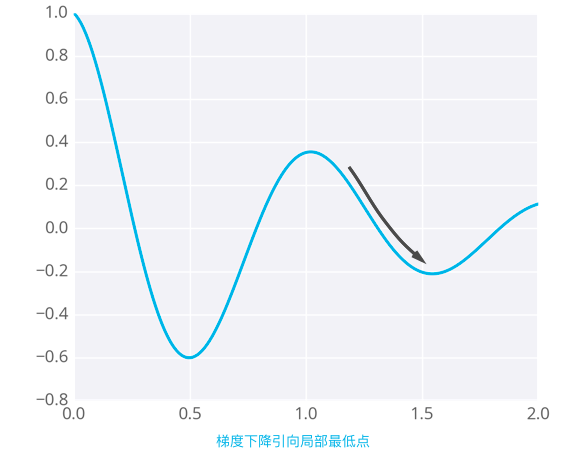

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/7.png")

有方法可以避免这一点，称作momentum.
## momentum(动量方法)